In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

데이터 로드

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

iris_df = pd.DataFrame(X,columns=iris.feature_names)
iris_df['speices'] = iris.target

#import seaborn as sns
#sns.pairplot(iris_df,hue='speices',vars=iris.feature_names)

데이터 추출, 표준화

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN - 5 

In [4]:
# 모델생성
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)
knn_acc = metrics.accuracy_score(knn_pred,y_test)

Logistic Regression

In [5]:
#모델 생성
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter=1000)
logi.fit(X_train_scaled, y_train)

logi_pred = logi.predict(X_test_scaled)
logi_acc = metrics.accuracy_score(logi_pred,y_test)

결정트리 이미지 생성 함수 정의

In [6]:
from sklearn.tree import export_graphviz

def tree_img(model):
    export_graphviz(model, out_file=("./{}.dot".format(model.criterion)),
                        feature_names = iris.feature_names,
                        filled = True,        # 그림에 색상을 넣을것인가
                        rounded = True,       # 반올림을 진행할 것인가
                        special_characters = True)    # 특수문자를 사용하나)
   
    !dot -Tjpg {model.criterion}.dot -o {model.criterion}.jpg
    img = plt.imread('./{}.jpg'.format(model.criterion))

    plt.figure(num=None, figsize=(16, 8), dpi=120,
          facecolor='w', edgecolor='k')
    
    plt.title('{} tree'.format(model.criterion))
    plt.imshow(img)
    plt.show()

지니 4

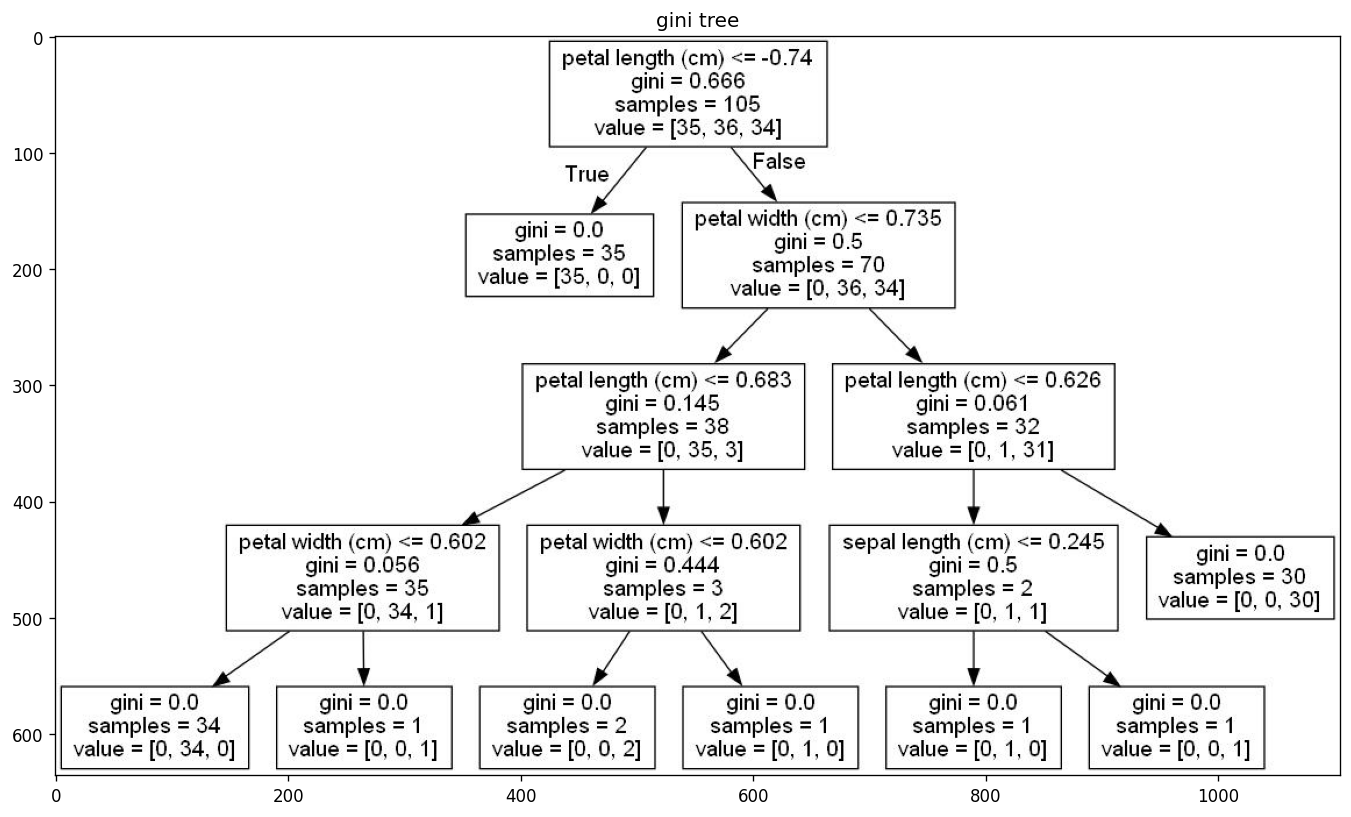

In [7]:
# 모델생성
from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(max_depth=4,
                                  criterion="gini")

gini_tree.fit(X_train_scaled, y_train)
gini_pred = gini_tree.predict(X_test_scaled)
gini_acc = metrics.accuracy_score(gini_pred,y_test)

tree_img(gini_tree)

엔트로피 4

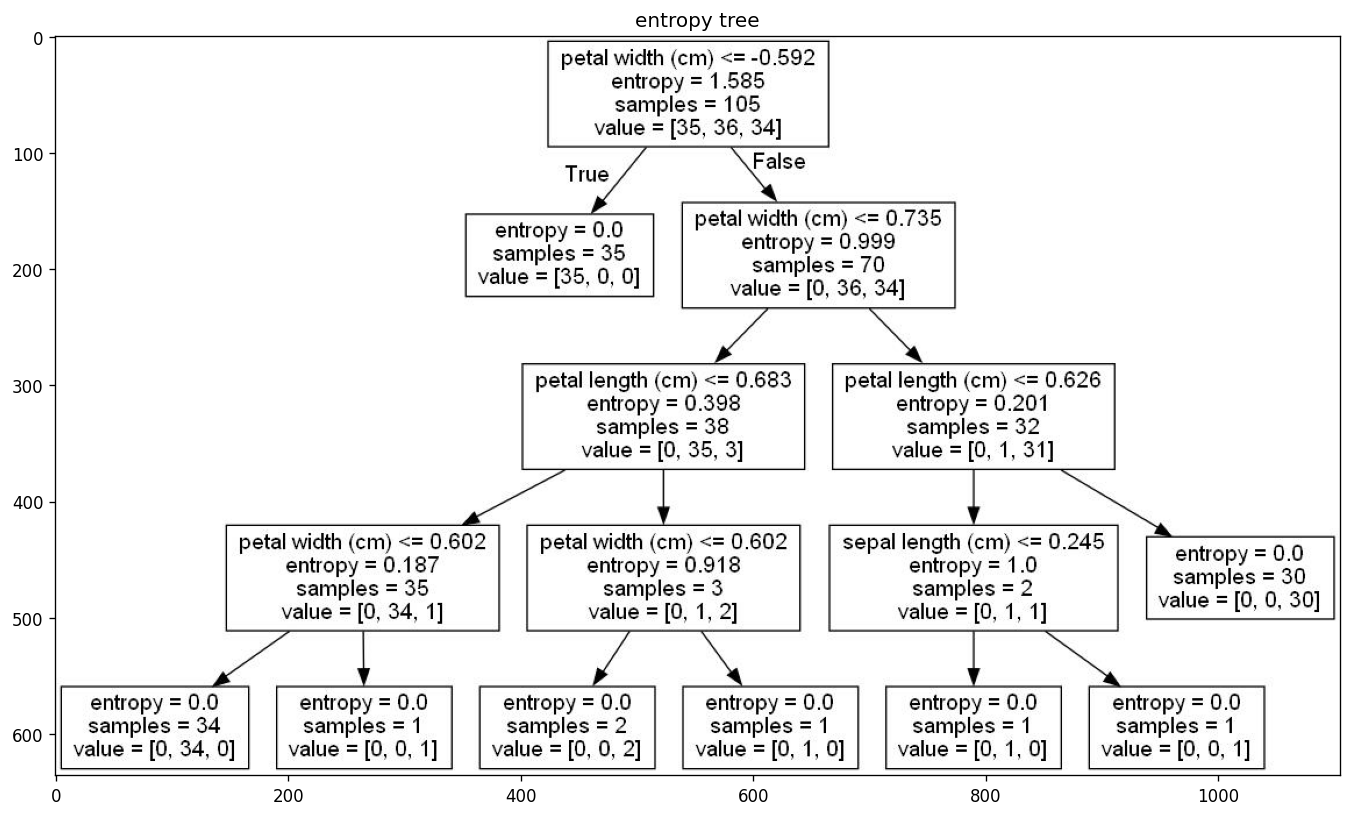

In [8]:
# 모델생성
ent_tree = DecisionTreeClassifier(max_depth=4,
                                  criterion="entropy")

ent_tree.fit(X_train_scaled, y_train)

ent_pred = ent_tree.predict(X_test_scaled)
ent_acc = metrics.accuracy_score(ent_pred,y_test)

tree_img(ent_tree)

SVM

In [9]:
from sklearn.svm import SVC

svm_lin =SVC(kernel='linear',C=1.0,random_state=0,probability=True)
svm_lin.fit(X_train_scaled, y_train)

svm_pred = svm_lin.predict(X_test_scaled)
svm_acc = metrics.accuracy_score(ent_pred,y_test)

모델 별 정확도 확인

In [10]:
print("knn : {}".format(knn_acc))
print("logi : {}".format(logi_acc))
print("gini : {}".format(gini_acc))
print("ent : {}".format(ent_acc))
print("svm : {}".format(svm_acc))

knn : 0.9333333333333333
logi : 0.9555555555555556
gini : 0.9555555555555556
ent : 0.9555555555555556
svm : 0.9555555555555556


In [11]:
iris = load_iris()
X, y = iris.data, iris.target

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
logi = LogisticRegression()
gini_tree = DecisionTreeClassifier(max_depth=4,criterion="gini")
ent_tree = DecisionTreeClassifier(max_depth=4,criterion="entropy")
svm_lin =SVC(probability=True)

from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('Logi', logi), 
                                            ('KNN', knn),
                                            ('svm',svm_lin),
                                            ('gini',gini_tree),
                                            ('ent',ent_tree)], 
                                voting='soft')

voting_model.fit(X_train_scaled, y_train)
pred = voting_model.predict(X_test_scaled)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
classifiers = [knn, logi, gini_tree, ent_tree,svm_lin]

for classifier in classifiers:
    classifier.fit(X_train_scaled, y_train)
    pred = classifier.predict(X_test_scaled)
    class_name = classifier.__class__.__name__
    print('{}'.format(class_name))
    print('Acc: {:.4f}'.format(accuracy_score(y_test, pred)))
    print(confusion_matrix(y_test,pred))
    print()

KNeighborsClassifier
Acc: 0.9556
[[13  0  0]
 [ 0 16  1]
 [ 0  1 14]]

LogisticRegression
Acc: 0.9556
[[13  0  0]
 [ 0 17  0]
 [ 0  2 13]]

DecisionTreeClassifier
Acc: 0.9333
[[13  0  0]
 [ 0 16  1]
 [ 0  2 13]]

DecisionTreeClassifier
Acc: 0.9333
[[13  0  0]
 [ 0 16  1]
 [ 0  2 13]]

SVC
Acc: 0.9556
[[12  1  0]
 [ 0 17  0]
 [ 0  1 14]]



In [15]:
print('앙상블 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

앙상블 분류기의 정확도:  0.9556
